# Import the Libraries

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Reading the data from flower recognition Kaggle dataset. Please refer to the below link : 
https://www.kaggle.com/datasets/alxmamaev/flowers-recognition

In [5]:
import os
print(os.listdir('/kaggle/input/flowers-recognition/flowers'))

['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']


In [6]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator


#Deep learning

from keras import backend as K
from keras import models
from keras.layers import Dropout,Dense,Flatten,Activation,Conv2D,MaxPooling2D,BatchNormalization
from keras.optimizers import SGD,Adam
from keras.utils import to_categorical

# Zip

import cv2                  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


# Data Processing and preparation

In [7]:
# Data preparation
X = []
Y = []
Flower_daisy_dir = '/kaggle/input/flowers-recognition/flowers/daisy'
Flower_dandelion_dir = '/kaggle/input/flowers-recognition/flowers/dandelion'
Flower_rose_dir = '/kaggle/input/flowers-recognition/flowers/rose'
Flower_sunflower_dir = '/kaggle/input/flowers-recognition/flowers/sunflower'
Flower_tulip_dir = '/kaggle/input/flowers-recognition/flowers/tulip'

In [8]:
def assign_label(img,flower_type):
    return flower_type

In [9]:
def make_train_data(flower_type,dir):
    for img in tqdm(os.listdir(dir)):
        label = assign_label(img,flower_type)
        path = os.path.join(dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(150,150))
        X.append(np.array(img))
        Y.append(str(label))
        

In [10]:
make_train_data('daisy',Flower_daisy_dir)

100%|██████████| 764/764 [00:07<00:00, 100.99it/s]


In [11]:
print (len(X))

764


In [12]:
make_train_data('dandelion',Flower_dandelion_dir)
print (len(X))

100%|██████████| 1052/1052 [00:10<00:00, 97.97it/s]

1816


In [13]:
make_train_data('rose',Flower_rose_dir)
print (len(X))

100%|██████████| 784/784 [00:08<00:00, 96.83it/s] 

2600


In [14]:
make_train_data('sunflower',Flower_sunflower_dir)
print (len(X))

100%|██████████| 733/733 [00:08<00:00, 88.72it/s]

3333


In [15]:
make_train_data('tulip',Flower_tulip_dir)
print (len(X))

100%|██████████| 984/984 [00:10<00:00, 93.52it/s] 

4317


# Visualize random data

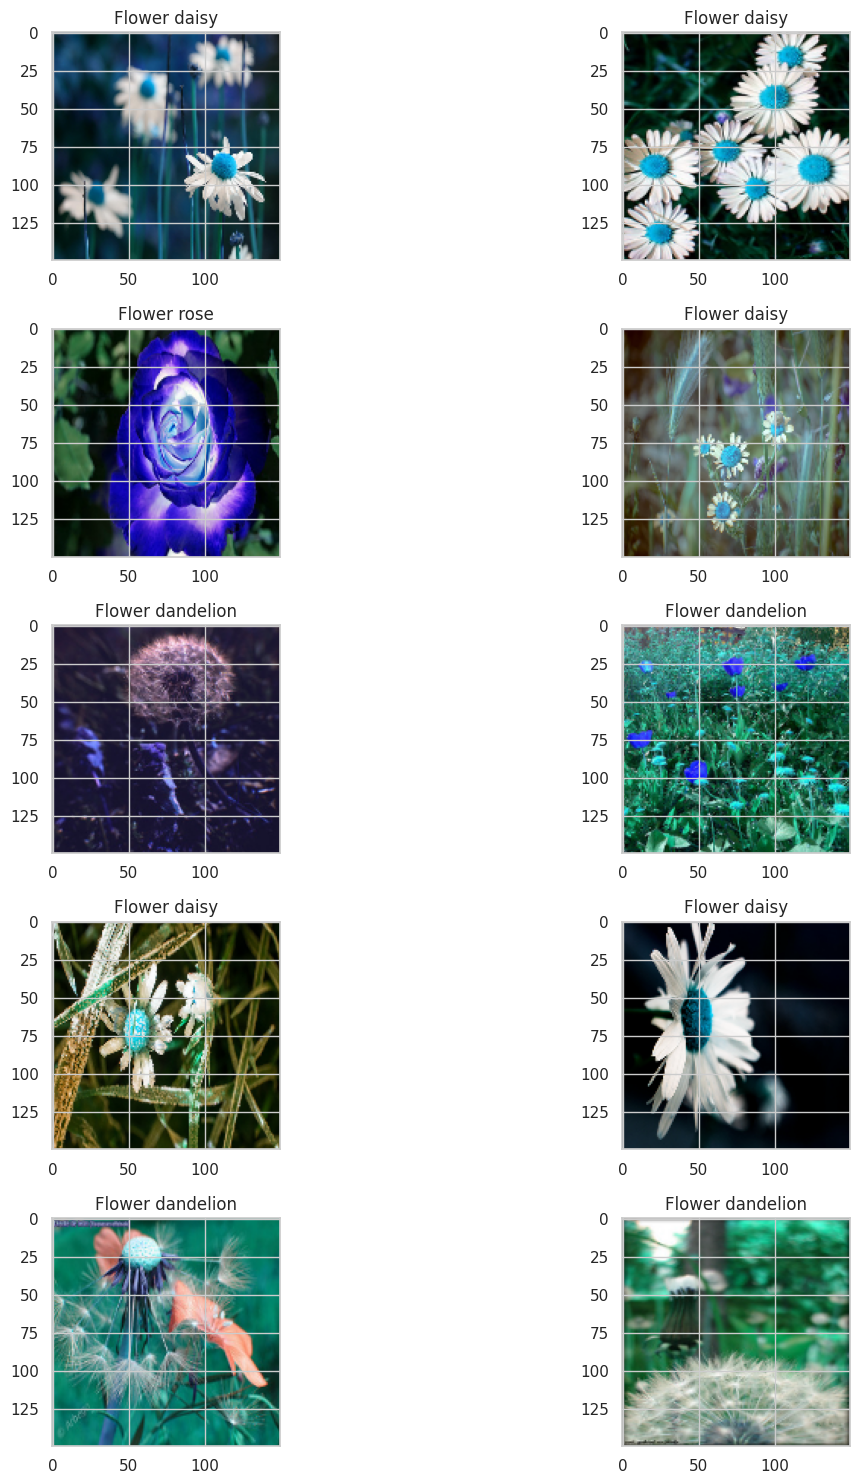

In [16]:
import random
import matplotlib.pyplot as plt
fig,ax = plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        l = random.randint(0,len(Y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower ' +Y[l])

plt.tight_layout()
plt.show()

# Label encoding the output and one hot encoding

In [17]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Yb = lb.fit_transform(Y)
Xb = np.array(X)
#Xb = Xb.astype('float32')
Xb = Xb/255.0

In [18]:
# Splitting between test and train

X_train, X_test, y_train, y_test = train_test_split(Xb,Yb,train_size=0.8,random_state=50)

In [19]:
print ('X_train',X_train.shape[0])
print ('y_train',y_train.shape[0])
print ('X_test',X_test.shape[0])
print ('y_test',y_test.shape[0])



X_train 3453
y_train 3453
X_test 864
y_test 864


In [20]:
#Random seeds
import random as rn
import tensorflow as tf
np.random.seed(50)
rn.seed(50)
tf.random.set_seed(50)

# Vanilla CNN Model 

In [21]:
#CNN model
def create_cnn():
    model = models.Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))


    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

    model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(5, activation = "softmax"))
    
    return model
    


# ALEXNET CNN

In [22]:
from tensorflow import keras
model2=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(150,150,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5,activation='softmax')  
    
    
])

In [23]:
#Data Augmentation

def data_augmentation():
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)
    
    datagen.fit(X_train)
    return datagen


In [24]:
#Compile thr model
def model_compile(model):
    model.compile(optimizer=Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    model.summary()

In [25]:
#Model fitting


def model_fit(model):
    history = model.fit_generator(datagen.flow(X_train,y_train,batch_size=128),epochs=50,steps_per_epoch=(X_train.shape[0]//128),validation_data=(X_test,y_test),shuffle=True,callbacks = [es,model_cp])
    return history

In [26]:
model = create_cnn()
model_compile(model)

from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

es = EarlyStopping(monitor = 'val_loss',min_delta = 0.0,patience=15)

model_cp = ModelCheckpoint('CNN_checkpoint_{epoch}_loss{val_loss}.h5',monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=True,period=1,mode='auto')
datagen = data_augmentation()
history = model_fit(model)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 37, 37, 96)        55392     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 18, 18, 96)      

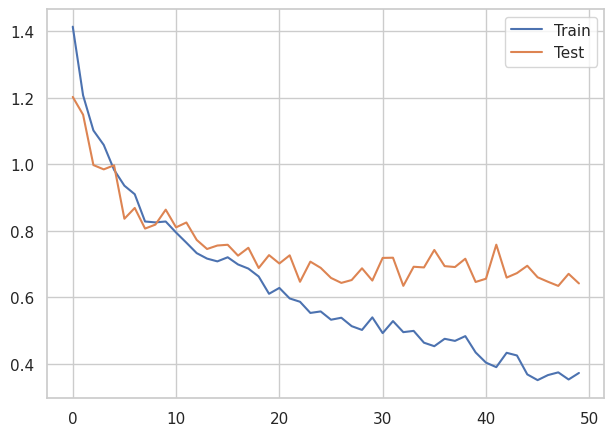

In [36]:
#Loss function plot
import pandas as pd
hist = pd.DataFrame(history.history)
plt.plot(hist['loss'],label='Train')
plt.plot(hist['val_loss'],label='Test')
plt.legend()
plt.show()

In [65]:
model.evaluate(X_test,y_test)

27/27 [==============================] - 0s 8ms/step - loss: 0.6421 - accuracy: 0.7859


[0.6421089172363281, 0.7858796119689941]

In [58]:
#Visualization of predictions

y_pred = model.predict(X_test)


27/27 [==============================] - 0s 7ms/step


In [59]:
for i in range (y_pred.shape[0]):
    k = np.argmax(y_pred[i,:])
    for j in range(y_pred.shape[1]):
        if j == k:
            y_pred[i,j] =1
        else:
            y_pred[i,j] =0

In [66]:
match_group = []
unmatch_group = []

for i in range (y_pred.shape[0]):
    k = np.argmax(y_pred[i,:])
    if k == np.argmax(y_test[i,:]):
        match_group.append(i)
    else:
        unmatch_group.append(i)
        
print ('matched', len(match_group))
print  ('unmatched',len(unmatch_group))


matched 679
unmatched 185


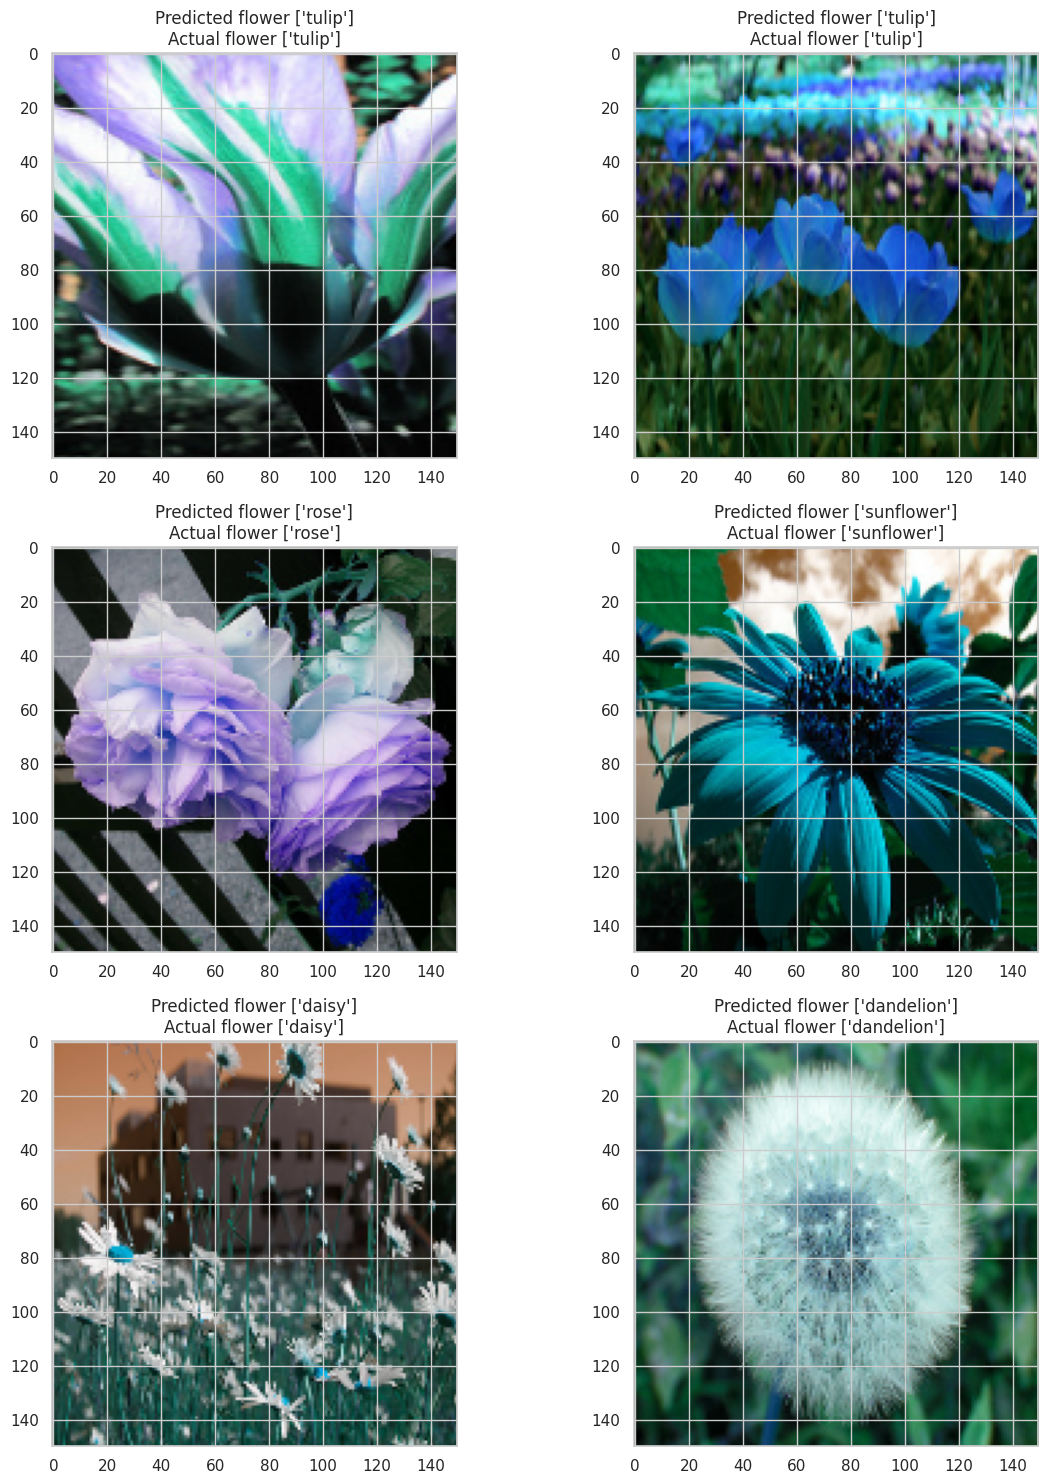

In [120]:
m = random.sample(match_group,6)
k=0
fig,ax=plt.subplots(3,2)
fig.set_size_inches(15,15)
for i in range (3):
    for j in range(2):
        ax[i,j].imshow(X_test[m[k]])
        ax[i,j].set_title('Predicted flower '+ str(lb.inverse_transform(y_pred[m[k]].reshape(1,-1)))+ '\n'+ 'Actual flower ' + str(lb.inverse_transform(y_test[m[k]].reshape(1,-1))))
        plt.tight_layout()
        
        k=k+1
        

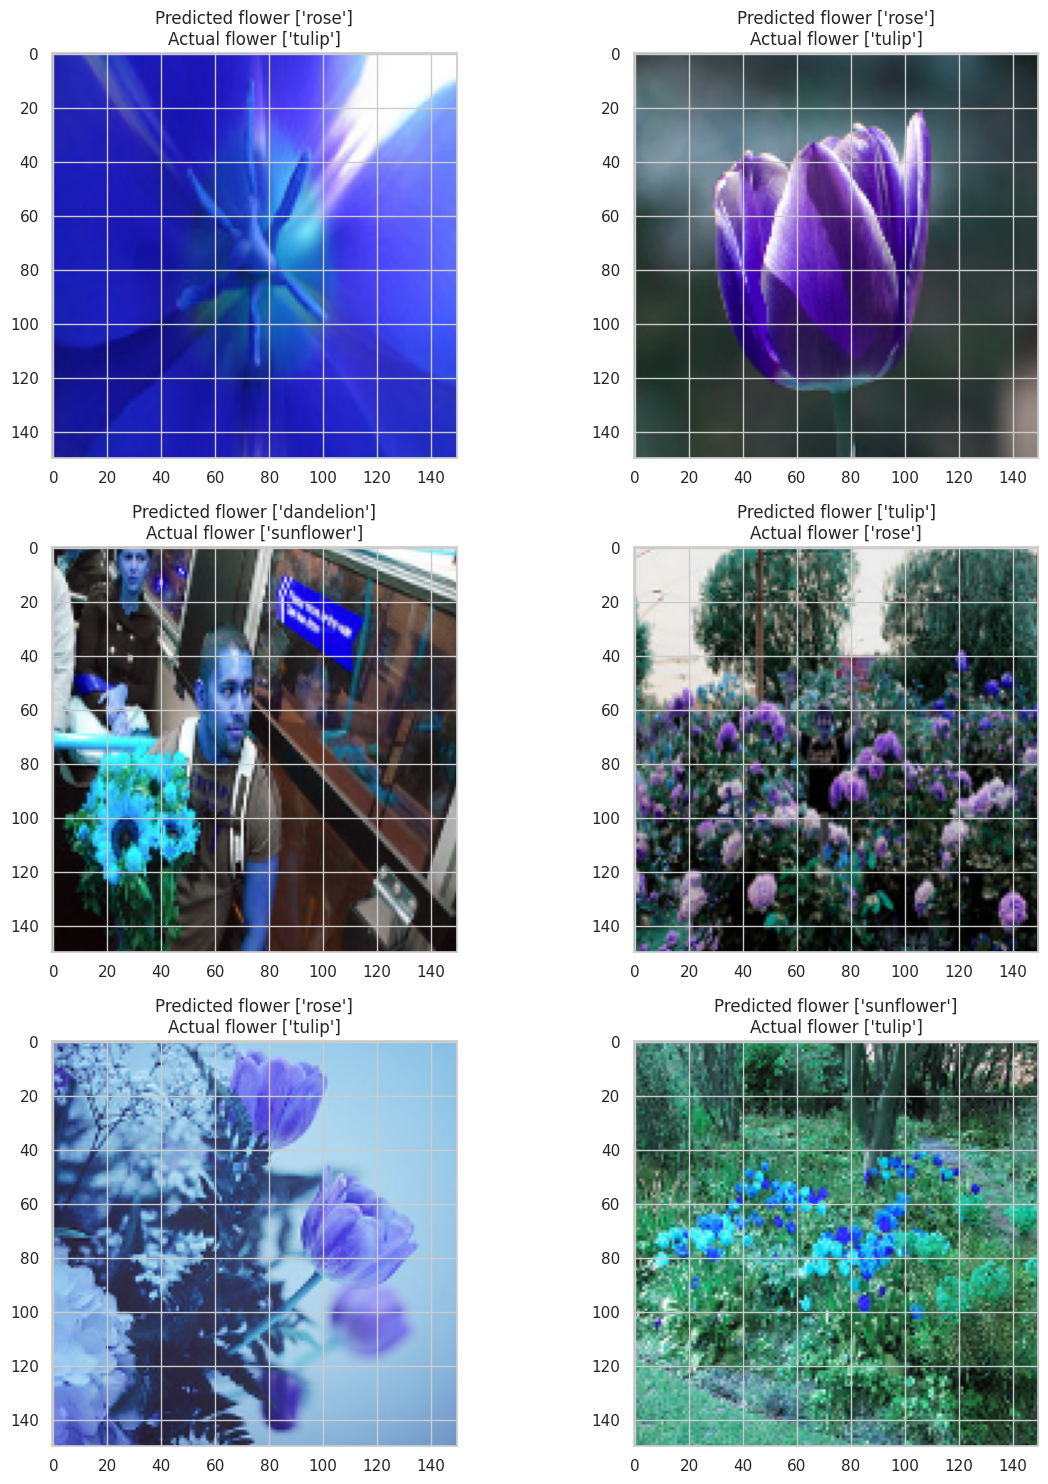

In [121]:
m = random.sample(unmatch_group,6)
k=0
fig,ax=plt.subplots(3,2)
fig.set_size_inches(15,15)
for i in range (3):
    for j in range(2):
        ax[i,j].imshow(X_test[m[k]])
        ax[i,j].set_title('Predicted flower '+ str(lb.inverse_transform(y_pred[m[k]].reshape(1,-1)))+ '\n'+ 'Actual flower ' + str(lb.inverse_transform(y_test[m[k]].reshape(1,-1))))
        plt.tight_layout()
        
        k=k+1